In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import pandas as pd

In [ ]:
img = cv2.imread('/content/pic.jpg',0)

In [ ]:
img = img[100:600,100:1000]

In [ ]:
img.shape

(500, 900)

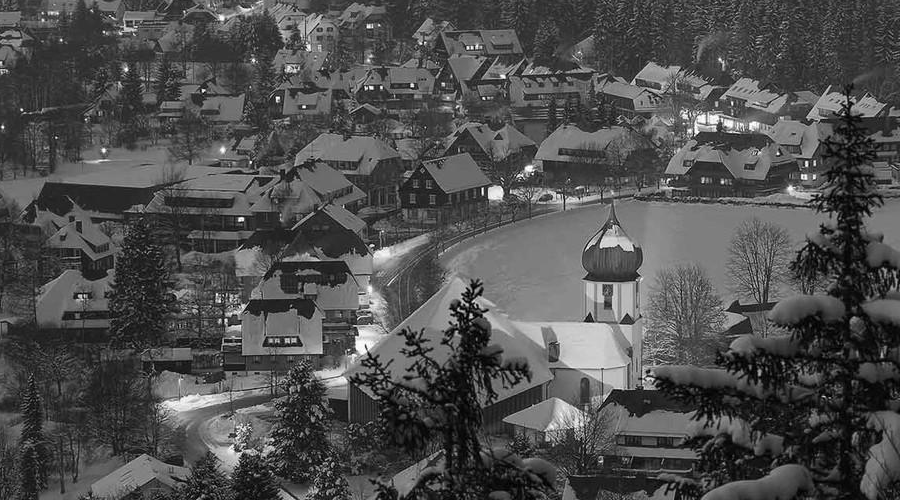

In [ ]:
cv2_imshow(img)

In [ ]:
new = np.ravel(img)
diff = new

(array([ 32278.,  94720., 121557.,  65825.,  80138.,  34878.,   9747.,
          6771.,   2957.,   1129.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <BarContainer object of 10 artists>)

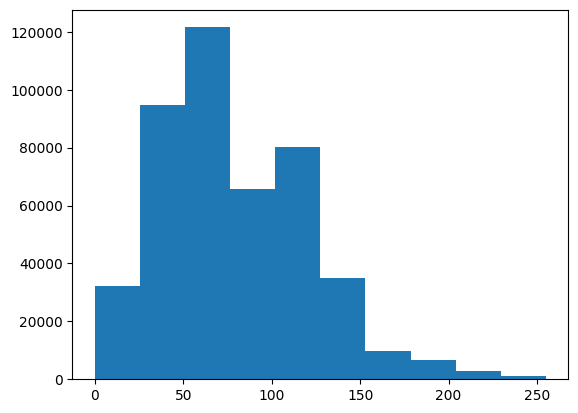

In [ ]:
plt.hist(new)

In [ ]:
df = pd.DataFrame(new,columns=["n"])

In [ ]:
n = pd.unique(df["n"])

In [ ]:
n.sort()

In [ ]:
count = [0 for i in range(len(n))]

In [ ]:
for i in range(len(new)):
  for j in range(len(n)):
    if n[j]==new[i]:
      count[j]+=1
      break

In [ ]:
Table = pd.DataFrame(n,columns=["n"])

In [ ]:
Table["nk"] = count

In [ ]:
Table["pk"] = Table["nk"] / sum(Table["nk"])

In [ ]:
cdf = [0 for i in range(len(n))]

In [ ]:
cdf[0] = Table.loc[0,"pk"]

In [ ]:
for i in range(1,len(n)):
    cdf[i] = cdf[i-1] + Table.loc[i,"pk"]

In [ ]:
Table['cdf'] = cdf

In [ ]:
Table['(n-1)*cdf'] = 255*Table["cdf"]

In [ ]:
Table['Rounded'] = round(Table['(n-1)*cdf'])

In [ ]:
Table

,n,nk,pk,cdf,(n-1)*cdf,Rounded
0,0,294,0.000653,0.000653,0.166600,0.0
1,1,144,0.000320,0.000973,0.248200,0.0
2,2,166,0.000369,0.001342,0.342267,0.0
3,3,272,0.000604,0.001947,0.496400,0.0
4,4,330,0.000733,0.002680,0.683400,1.0
...,...,...,...,...,...,...
251,251,20,0.000044,0.999720,254.928600,255.0
252,252,22,0.000049,0.999769,254.941067,255.0
253,253,19,0.000042,0.999811,254.951833,255.0
254,254,16,0.000036,0.999847,254.960900,255.0


In [ ]:
for i in range(len(new)):
  diff[i] = int(Table.loc[new[i],"Rounded"])

(array([43393., 43386., 46203., 41452., 50133., 44378., 45435., 43133.,
        46477., 46010.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <BarContainer object of 10 artists>)

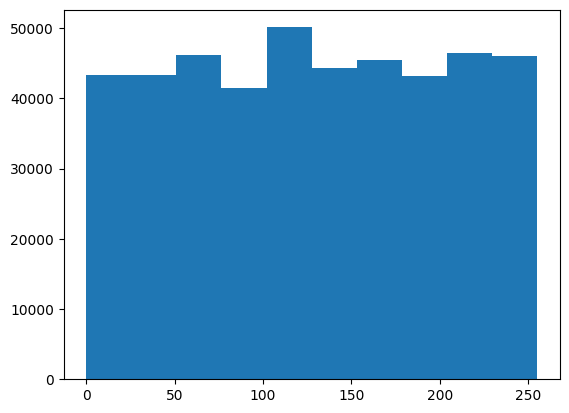

In [ ]:
plt.hist(diff)

In [ ]:
diff = diff.reshape(500,900)

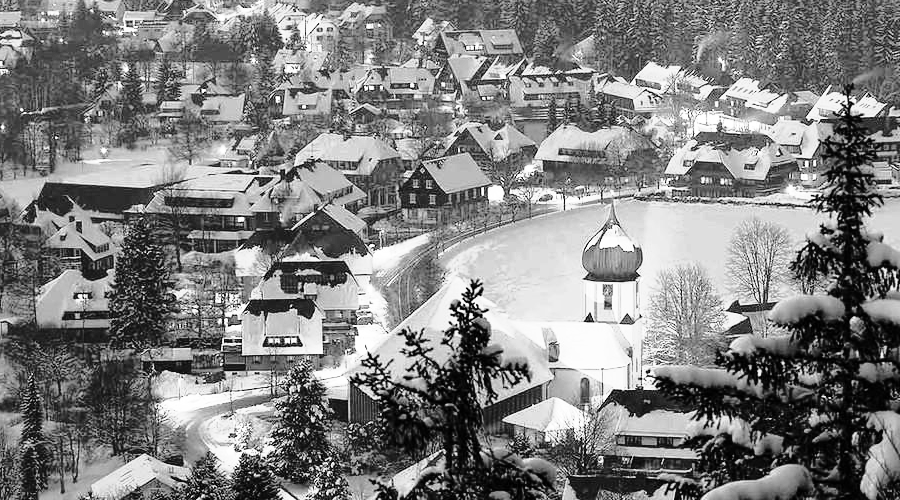

In [ ]:
cv2_imshow(diff)